# EE 298 Deep Learning Assignment
Build a classifier on CIFAR10 using:  
a) MLP  
b) CNN  
Then compare the performance of both networks.

## Import modules and load the dataset

In [ ]:
import numpy as np
import tensorflow
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import SGD

# Load CIFAR10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Compute the number of labels
num_labels = len(np.unique(y_train))
print(f"Number of labels: {num_labels}")

Number of labels: 10


## Data Pre-processing

In [ ]:
y_train = to_categorical(y_train, num_labels)
y_test = to_categorical(y_test, num_labels)

In [ ]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size * x_train.shape[3]

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

## MLP

### Model

In [ ]:
kernel_regularizer = regularizers.l2(l2=1e-5)
activity_regularizer = regularizers.l2(1e-5)
bias_regularizer=regularizers.l2(1e-5)
kernel_initializer = 'glorot_uniform'

In [ ]:
inputs = Input(shape=input_size)
y = Dense(2048,
          input_dim=input_size,
          kernel_regularizer=kernel_regularizer,
          kernel_initializer=kernel_initializer,
          activity_regularizer=activity_regularizer,
          bias_regularizer=bias_regularizer,
          activation='relu')(inputs)
y = Dense(512,
          input_dim=input_size,
          kernel_regularizer=kernel_regularizer,
          kernel_initializer=kernel_initializer,
          activity_regularizer=activity_regularizer,
          bias_regularizer=bias_regularizer,
          activation='relu')(y)
y = Dense(256,
          input_dim=input_size,
          kernel_regularizer=kernel_regularizer,
          kernel_initializer=kernel_initializer,
          activity_regularizer=activity_regularizer,
          bias_regularizer=bias_regularizer,
          activation='relu')(y)
y = Dense(128,
          kernel_regularizer=kernel_regularizer,
          kernel_initializer=kernel_initializer,
          activity_regularizer=activity_regularizer,
          bias_regularizer=bias_regularizer,
          activation='relu')(y)
y = Dense(64,
          kernel_regularizer=kernel_regularizer,
          kernel_initializer=kernel_initializer,
          activity_regularizer=activity_regularizer,
          bias_regularizer=bias_regularizer,
          activation='relu')(y)
y = Dense(128,
          kernel_regularizer=kernel_regularizer,
          kernel_initializer=kernel_initializer,
          activity_regularizer=activity_regularizer,
          bias_regularizer=bias_regularizer,
          activation='relu')(y)
y = Dense(256,
          kernel_regularizer=kernel_regularizer,
          kernel_initializer=kernel_initializer,
          activity_regularizer=activity_regularizer,
          bias_regularizer=bias_regularizer,
          activation='relu')(y)
y = Dense(512,
          kernel_regularizer=kernel_regularizer,
          kernel_initializer=kernel_initializer,
          activity_regularizer=activity_regularizer,
          bias_regularizer=bias_regularizer,
          activation='relu')(y)
y = Dense(2048,
          kernel_regularizer=kernel_regularizer,
          kernel_initializer=kernel_initializer,
          activity_regularizer=activity_regularizer,
          bias_regularizer=bias_regularizer,
          activation='relu')(y)
outputs = Dense(num_labels,
                kernel_regularizer=kernel_regularizer,
                kernel_initializer=kernel_initializer,
                activity_regularizer=activity_regularizer,
                bias_regularizer=bias_regularizer,
                activation='softmax')(y)

model = Model(inputs=inputs,
              outputs=outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

# Training and Evaluation

### Hyperparameters

In [ ]:
learning_rate = 0.001
momentum = 0.9
epochs = 50
batch_size = 32

In [ ]:
opt = SGD(learning_rate=learning_rate, momentum=momentum)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=epochs,
                    batch_size=batch_size)
loss, acc = model.evaluate(x_test, y_test,
                           batch_size=batch_size)
print(f"Test Accuracy: {acc * 100.0}")

Epoch 1/50
1563/1563 [==============================] - 112s 72ms/step - loss: 2.0878 - accuracy: 0.2382 - val_loss: 1.9719 - val_accuracy: 0.3034
Epoch 2/50
1563/1563 [==============================] - 120s 77ms/step - loss: 1.8084 - accuracy: 0.3590 - val_loss: 1.7141 - val_accuracy: 0.3985
Epoch 3/50
1563/1563 [==============================] - 115s 74ms/step - loss: 1.6900 - accuracy: 0.4076 - val_loss: 1.6241 - val_accuracy: 0.4422
Epoch 4/50
1563/1563 [==============================] - 113s 72ms/step - loss: 1.6182 - accuracy: 0.4355 - val_loss: 1.5898 - val_accuracy: 0.4471
Epoch 5/50
1563/1563 [==============================] - 111s 71ms/step - loss: 1.5595 - accuracy: 0.4580 - val_loss: 1.5751 - val_accuracy: 0.4527
Epoch 6/50
1563/1563 [==============================] - 113s 72ms/step - loss: 1.5118 - accuracy: 0.4761 - val_loss: 1.5304 - val_accuracy: 0.4652
Epoch 7/50
1563/1563 [==============================] - 113s 73ms/step - loss: 1.4768 - accuracy: 0.4886 - val_loss: 1

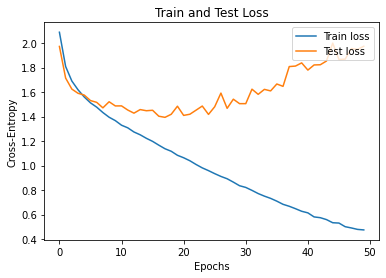

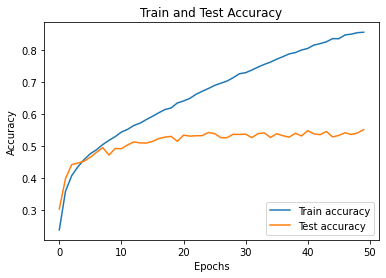

In [ ]:
import matplotlib.pyplot as plt

# Plot history: Loss and accuracy
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

# Plot history: Loss and accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()